In [54]:
from common import Graph

In [55]:
class BfsContext:
    
    COLOR_WHITE = 1
    COLOR_GRAY = 2
    COLOR_BLACK = 3
    
    def __init__(self, g):
        self.ctl = 0 # 
        self.discovered = {} # 首次访问时的计数
        self.color = {} # 顶点涂色
        self.list = []
        self.pred = {} # 前驱结点
        self.distance ={} # 距离
        
        for k in g.V:
            v = g.V[k]            
            self.color[v.v] = self.COLOR_WHITE
            self.pred[v.v] = -1        
        
    def __str__(self):
        s = '{\n'
        s += '    ctl = %d\n' % self.ctl
        s += '    discovered = %s\n' % str(self.discovered)
        s += '    color = %s\n' % str(self.color)
        s += '    list = %s\n' % str(self.list)
        s += '    pred = %s\n' % str(self.pred)
        s += '    distance = %s\n' % str(self.distance)
        s += '}\n'
        
        return s

    
class BfsGraph(Graph):
    
    def __init__(self):
        super(BfsGraph, self).__init__()
        
    def bfs_visit(self, q, context):        
        while len(q) > 0:
            e = q.pop(0)

            v = self.findV(e.v)
            
            context.list.append(v)

            context.ctl += 1
            context.discovered[e.v] = context.ctl

            n = v.next
            while n != None:
                if context.color[n.v] == context.COLOR_WHITE:
                    context.pred[n.v] = e.v
                    context.distance[n.v] = context.distance[e.v] + 1
                    context.color[n.v] = context.COLOR_GRAY
                    
                    q.append(n)

                n = n.next

            context.color[e.v] = context.COLOR_BLACK
        
    def bfs_search(self):
        context = BfsContext(self)
        
        for k in self.V:
            v = self.V[k]
            
            if context.color[v.v] == context.COLOR_WHITE:
                q = []
                q.append(v)
                
                context.distance[v.v] = 0
                context.color[v.v] = context.COLOR_GRAY
                
                self.bfs_visit(q, context)
        
        return context

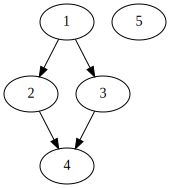

In [56]:
g = BfsGraph()
g.addV(1)
g.addV(2)
g.addV(3)
g.addV(4)
g.addV(5)

g.addE(1, 2)
g.addE(1, 3)
g.addE(3, 4)
g.addE(2, 4)

g.draw()

In [57]:
print(g)

1: 2, 3
2: 4
3: 4
4: 
5: 



In [58]:
context = g.bfs_search()
print (context)

{
    ctl = 5
    discovered = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
    color = {1: 3, 2: 3, 3: 3, 4: 3, 5: 3}
    list = [1, 2, 3, 4, 5]
    pred = {1: -1, 2: 1, 3: 1, 4: 2, 5: -1}
    distance = {1: 0, 2: 1, 3: 1, 4: 2, 5: 0}
}

